<a href="https://colab.research.google.com/github/rawanMahmoud81/Machine-Learning-Data-analysis/blob/main/Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,MinMaxScaler,RobustScaler
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import  VotingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from  xgboost import XGBClassifier

In [ ]:
df=pd.DataFrame(digits.data,columns=digits.feature_names)
df['target']=digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
Y=df['target']
X=df.drop('target',axis=1)

In [ ]:
X.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [ ]:
"""from sklearn.model_selection import cross_val_score ,KFold
kfold=KFold(n_splits=10,shuffle=True)
cv_scores=cross_val_score(LogisticRegression(),X,Y,cv=kfold,scoring='accuracy')

"""



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
"""print("Cross-Validation Scores:",cv_scores)
print("Mean Accuracy:",cv_scores.mean())
print("Standard Deviation:",cv_scores.std())
"""

Cross-Validation Scores: [0.95555556 0.97777778 0.98333333 0.93888889 0.97222222 0.95555556
 0.97777778 0.93296089 0.96089385 0.97206704]
Mean Accuracy: 0.9627032898820607
Standard Deviation: 0.016172690003464465


In [ ]:
from re import M
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
lR=LogisticRegression(penalty='elasticnet', solver='saga', C=0.8, l1_ratio=0.8)
lR.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.8, l1_ratio=0.8, penalty='elasticnet', solver='saga')

In [ ]:
Y_pred=lR.predict(X_train)
print(classification_report(Y_train,Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       0.94      0.96      0.95       154
           2       0.99      0.99      0.99       144
           3       1.00      0.97      0.98       149
           4       1.00      0.97      0.98       135
           5       0.98      0.99      0.99       135
           6       1.00      0.99      0.99       146
           7       0.99      1.00      1.00       145
           8       0.93      0.97      0.95       144
           9       0.97      0.97      0.97       140

    accuracy                           0.98      1437
   macro avg       0.98      0.98      0.98      1437
weighted avg       0.98      0.98      0.98      1437



In [ ]:
Y_pred=lR.predict(X_test)
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      0.93      0.93        28
           2       0.94      1.00      0.97        33
           3       1.00      0.97      0.99        34
           4       1.00      0.96      0.98        46
           5       0.94      0.94      0.94        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.97      0.93      0.95        30
           9       0.93      0.97      0.95        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [ ]:
print(confusion_matrix(Y_test, Y_pred))

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 26  1  0  0  0  0  0  0  1]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  1  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  1 39]]


In [ ]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred2= knn.predict(X_test)
print(classification_report(Y_test,y_pred2))
print(confusion_matrix(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0

In [ ]:
sg=SGDClassifier(loss='log_loss',average=True)
sg.fit(X_train,Y_train)

SGDClassifier(average=True, loss='log_loss')

In [ ]:
Y_pred=sg.predict(X_train)
print(classification_report(Y_train,Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       145
           1       0.96      0.97      0.96       154
           2       0.99      1.00      1.00       144
           3       0.99      0.97      0.98       149
           4       1.00      0.97      0.98       135
           5       0.98      0.99      0.98       135
           6       0.99      0.99      0.99       146
           7       0.98      1.00      0.99       145
           8       0.95      0.93      0.94       144
           9       0.96      0.96      0.96       140

    accuracy                           0.98      1437
   macro avg       0.98      0.98      0.98      1437
weighted avg       0.98      0.98      0.98      1437



In [ ]:
Y_pred=sg.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      0.96      0.95        28
           2       0.97      1.00      0.99        33
           3       1.00      0.94      0.97        34
           4       1.00      0.98      0.99        46
           5       0.91      0.91      0.91        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.90      0.93      0.92        30
           9       0.90      0.93      0.91        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [ ]:
dt= DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred3= dt.predict(X_test)
print(classification_report(Y_test, y_pred3))
print(confusion_matrix(Y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.93      0.79      0.85        33
           3       0.83      0.88      0.86        34
           4       0.82      0.87      0.84        46
           5       0.93      0.91      0.92        47
           6       0.89      0.94      0.92        35
           7       0.79      0.91      0.85        34
           8       0.71      0.67      0.69        30
           9       0.83      0.85      0.84        40

    accuracy                           0.86       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.86      0.86       360

[[29  0  0  0  2  1  0  0  0  1]
 [ 0 22  1  0  1  0  0  1  2  1]
 [ 0  1 26  2  0  0  0  1  3  0]
 [ 0  0  0 30  1  0  1  0  1  1]
 [ 0  0  0  0 40  1  2  2  1  0]
 [ 0  0  1  0  2 43  1  0  0  0]
 [ 0  0  0  0  2  0 33  0  0  0]
 [ 0  0  0

In [ ]:
svl =SVC(kernel='linear')
svl.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
y_pred5= svl.predict(X_test)
print(classification_report(Y_test, y_pred5))
print(confusion_matrix(Y_test, y_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       0.97      0.93      0.95        30
           9       0.97      0.97      0.97        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0

In [ ]:
svrbf =SVC(kernel='rbf')
svrbf.fit(X_train,Y_train)

SVC()

In [ ]:
y_predrbf= svrbf.predict(X_test)
print(classification_report(Y_test, y_predrbf))
print(confusion_matrix(Y_test, y_predrbf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       0.99      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0

In [ ]:
svsg =SVC(kernel='sigmoid')
svsg.fit(X_train,Y_train)

SVC(kernel='sigmoid')

In [ ]:
y_predsig= svsg.predict(X_test)
print(classification_report(Y_test, y_predsig))
print(confusion_matrix(Y_test, y_predsig))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.69      0.79      0.73        28
           2       0.97      0.88      0.92        33
           3       0.97      0.94      0.96        34
           4       0.92      0.96      0.94        46
           5       0.96      0.94      0.95        47
           6       0.94      0.97      0.96        35
           7       0.94      0.97      0.96        34
           8       0.81      0.73      0.77        30
           9       0.85      0.85      0.85        40

    accuracy                           0.90       360
   macro avg       0.90      0.90      0.90       360
weighted avg       0.91      0.90      0.90       360

[[31  0  0  0  2  0  0  0  0  0]
 [ 0 22  0  0  2  0  0  1  1  2]
 [ 0  2 29  0  0  0  1  0  1  0]
 [ 0  1  0 32  0  0  0  0  1  0]
 [ 1  1  0  0 44  0  0  0  0  0]
 [ 0  0  0  0  0 44  1  0  0  2]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0

In [ ]:
gnb=GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
y_predgnb= gnb.predict(X_test)
print(classification_report(Y_test, y_predgnb))
print(confusion_matrix(Y_test, y_predgnb))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.82      0.82      0.82        28
           2       0.90      0.55      0.68        33
           3       0.94      0.85      0.89        34
           4       1.00      0.76      0.86        46
           5       0.88      0.94      0.91        47
           6       0.90      1.00      0.95        35
           7       0.63      0.97      0.77        34
           8       0.55      0.87      0.68        30
           9       0.96      0.65      0.78        40

    accuracy                           0.83       360
   macro avg       0.86      0.83      0.83       360
weighted avg       0.87      0.83      0.84       360

[[31  0  0  0  0  1  0  1  0  0]
 [ 0 23  0  0  0  0  0  1  3  1]
 [ 0  3 18  0  0  0  1  0 11  0]
 [ 0  0  1 29  0  1  0  0  3  0]
 [ 0  0  0  0 35  0  2  9  0  0]
 [ 0  0  0  1  0 44  1  1  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0

In [ ]:
rf= RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
y_predensen= rf.predict(X_test)
print(classification_report(Y_test, y_predensen))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       0.96      1.00      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      0.97      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [ ]:
ada= AdaBoostClassifier()
ada.fit(X_train, Y_train)

AdaBoostClassifier()

In [ ]:
y_predensen= ada.predict(X_test)
print(classification_report(Y_test, y_predensen))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.87      0.46      0.60        28
           2       0.81      0.64      0.71        33
           3       0.71      0.85      0.77        34
           4       0.92      0.76      0.83        46
           5       1.00      0.87      0.93        47
           6       0.85      0.94      0.89        35
           7       0.74      0.94      0.83        34
           8       0.53      0.77      0.63        30
           9       0.71      0.80      0.75        40

    accuracy                           0.80       360
   macro avg       0.81      0.79      0.79       360
weighted avg       0.82      0.80      0.80       360



In [ ]:
xbg=XGBClassifier()
xbg.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_predxgb= xbg.predict(X_test)
print(classification_report(Y_test, y_predxgb))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      0.98      0.98        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.93      0.93      0.93        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [ ]:
gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)

GradientBoostingClassifier()

In [ ]:
y_predgb= gb.predict(X_test)
print(classification_report(Y_test, y_predgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      0.97      0.98        33
           3       1.00      0.94      0.97        34
           4       1.00      0.96      0.98        46
           5       0.98      0.98      0.98        47
           6       0.97      0.94      0.96        35
           7       0.92      0.97      0.94        34
           8       0.91      1.00      0.95        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [ ]:
estimators = [('lr', LogisticRegression()), ('svm', SVC()), ('xgb', XGBClassifier()), ('rf', RandomForestClassifier()), ('ada', AdaBoostClassifier())]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, Y_train)
y_pred_ensemble = ensemble.predict(X_test)
print(classification_report(Y_test, y_pred_ensemble))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [ ]:
model = keras.Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9811 - loss: 0.0776 - val_accuracy: 0.9861 - val_loss: 0.0804
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9906 - loss: 0.0594 - val_accuracy: 0.9861 - val_loss: 0.0709
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9895 - loss: 0.0587 - val_accuracy: 0.9792 - val_loss: 0.0839
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9885 - loss: 0.0502 - val_accuracy: 0.9861 - val_loss: 0.0716
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9900 - loss: 0.0490 - val_accuracy: 0.9861 - val_loss: 0.0764
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9971 - loss: 0.0310 - val_accuracy: 0.9653 - val_loss: 0.0962
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9948 - loss: 0.0391 - val_accuracy: 0.9931 - val_loss: 0.0547
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9989 - loss: 0.0320 - val_accuracy: 0.9931 - val_loss

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9796 - loss: 0.0769 
Test Loss: 0.09790723770856857
Test Accuracy: 0.9694444537162781


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(Y_test, y_pred_classes))
print(confusion_matrix(Y_test, y_pred_classes))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       1.00      0.96      0.98        28
           2       0.94      1.00      0.97        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.96      0.94      0.95        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.94      0.97      0.95        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

[[32  0  1  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  1  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 

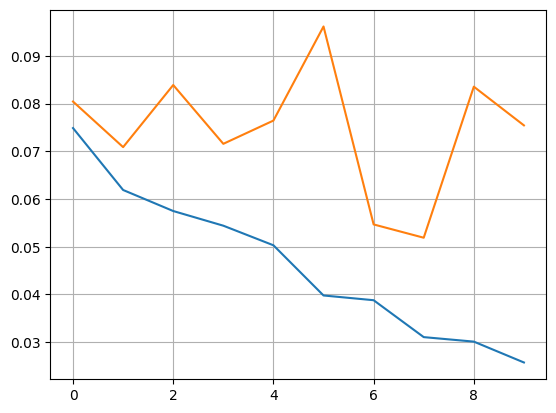

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()